In [2]:
#IMPORTS
import pandas as pd
import h5py
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import sys
import os
import scipy.signal as sgn
import numpy as np
import matplotlib.pyplot as plt
import random

sys.path.append('../Pre-processing')  
from filters import ecg_filtrado

In [9]:
#CARREGAR OS DADOS
caminho_arquivo = "../Database/exams.csv"
dados = pd.read_csv(caminho_arquivo)

# Selecionar os índices com base nos critérios fornecidos
ecg_normal_linhas = dados.index[(dados.iloc[:, 14] == "exams_part17.hdf5") & (dados.iloc[:, 13] == True) ]
ecg_ST_linhas = dados.index[(dados.iloc[:, 14] == "exams_part17.hdf5") & (dados.iloc[:, 8] == True) ]

ecg_ST_id = dados.iloc[ecg_ST_linhas, 0].tolist()
ecg_normal_id = dados.iloc[ecg_normal_linhas, 0].tolist()
print(ecg_ST_id[54])
ecg_ST = ecg_ST_id[:100]
ecg_normal = ecg_normal_id[:100]

1943318


In [3]:
import h5py
import numpy as np
import pandas as pd


# Caminhos para os arquivos
caminho_csv = "../Database/exams.csv"
caminho_hdf5_origem_16 = "exams_part15.hdf5"
caminho_hdf5_origem_17 = "exams_part14.hdf5"
caminho_hdf5_destino = "filtered_exams_14_15.hdf5"

# Carregar os dados do CSV
dados = pd.read_csv(caminho_csv)

# Selecionar os índices com base nos critérios fornecidos

todos_ecgs_linhas = dados.index[(dados.iloc[:, 14] == "exams_part15.hdf5") | (dados.iloc[:, 14] == "exams_part14.hdf5")]


todos_ecgs_id = dados.iloc[todos_ecgs_linhas, 0].tolist()


# Lista de caminhos para arquivos HDF5 de origem
caminhos_hdf5_origem = [caminho_hdf5_origem_16, caminho_hdf5_origem_17]

# Criar o novo arquivo HDF5
with h5py.File(caminho_hdf5_destino, 'w') as f_destino:
    # Lista para armazenar os exames filtrados
    filtered_tracings_list = []
    filtered_exam_id_list = []

    for caminho in caminhos_hdf5_origem:
        # Abrir o arquivo HDF5 de origem
        with h5py.File(caminho, 'r') as f_origem:
            tracings = f_origem['tracings']
            exam_id = f_origem['exam_id']

            # Filtrar apenas os exames que queremos processar
            indices_interessantes = [i for i, id_ in enumerate(exam_id) if id_ in todos_ecgs_id]

            # Processar e salvar cada exame
            for original_idx in indices_interessantes:
                # Obter o exame original
                original_tracing = tracings[original_idx]

                # Aplicar a filtragem em cada lead
                filtered_tracing = np.array([ecg_filtrado(lead) for lead in original_tracing.T]).T

                # Adicionar o exame filtrado à lista
                filtered_tracings_list.append(filtered_tracing)
                filtered_exam_id_list.append(exam_id[original_idx])

    # Criar datasets para os exames filtrados no arquivo de destino
    num_exams = len(filtered_tracings_list)
    filtered_tracings = f_destino.create_dataset('tracings', (num_exams, 4096, 12), dtype=np.float32)
    filtered_exam_id = f_destino.create_dataset('exam_id', (num_exams,), dtype=np.int32)

    # Copiar os dados das listas para os datasets
    for idx, (tracing, exam_id) in enumerate(zip(filtered_tracings_list, filtered_exam_id_list)):
        filtered_tracings[idx] = tracing
        filtered_exam_id[idx] = exam_id

print("Filtragem e salvamento concluídos!")


Filtragem e salvamento concluídos!


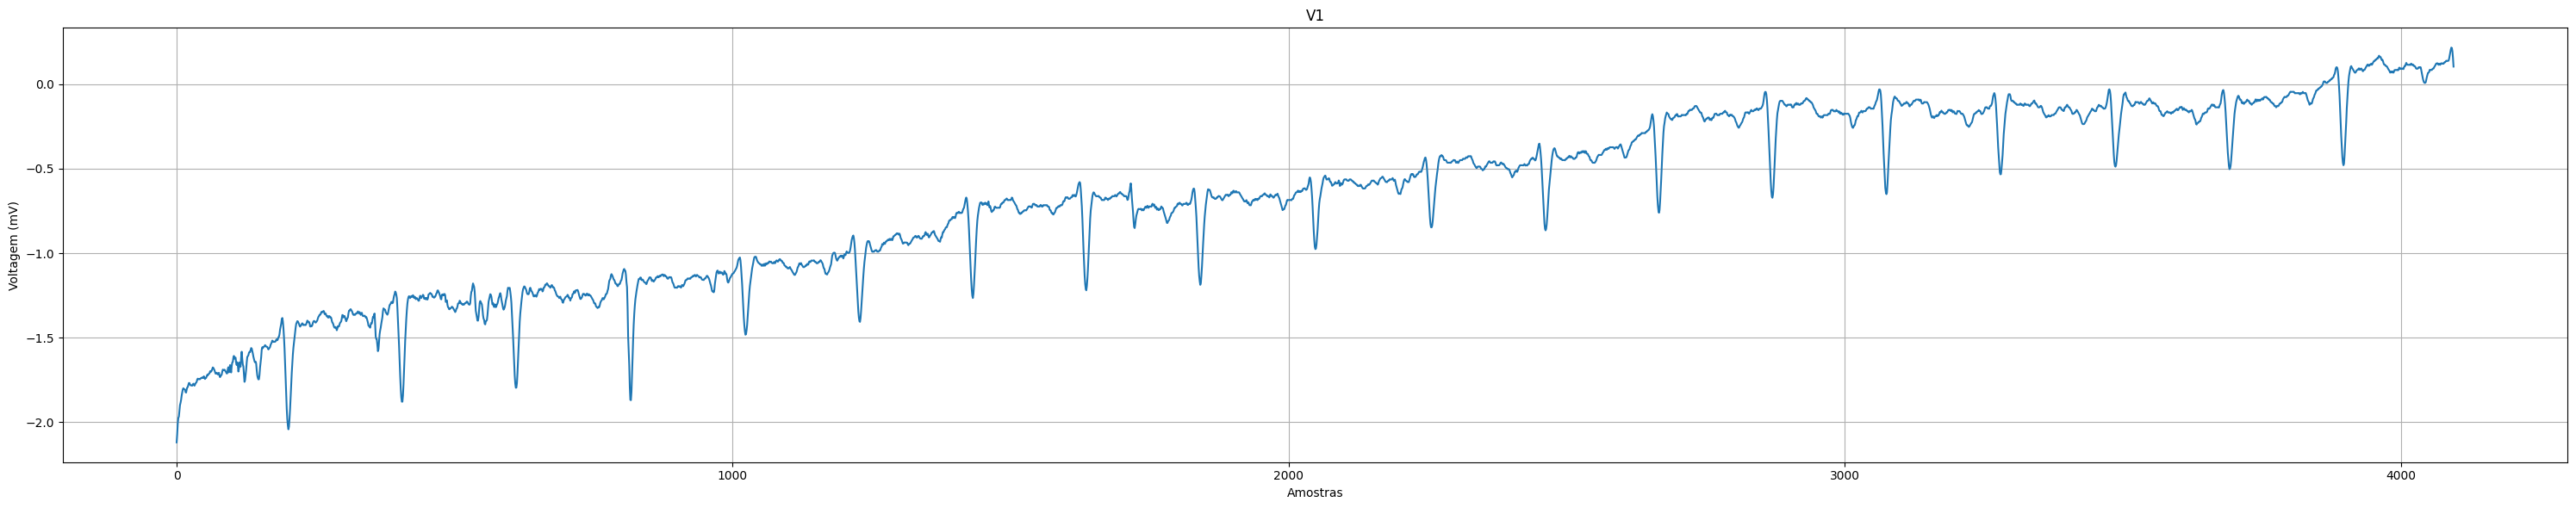

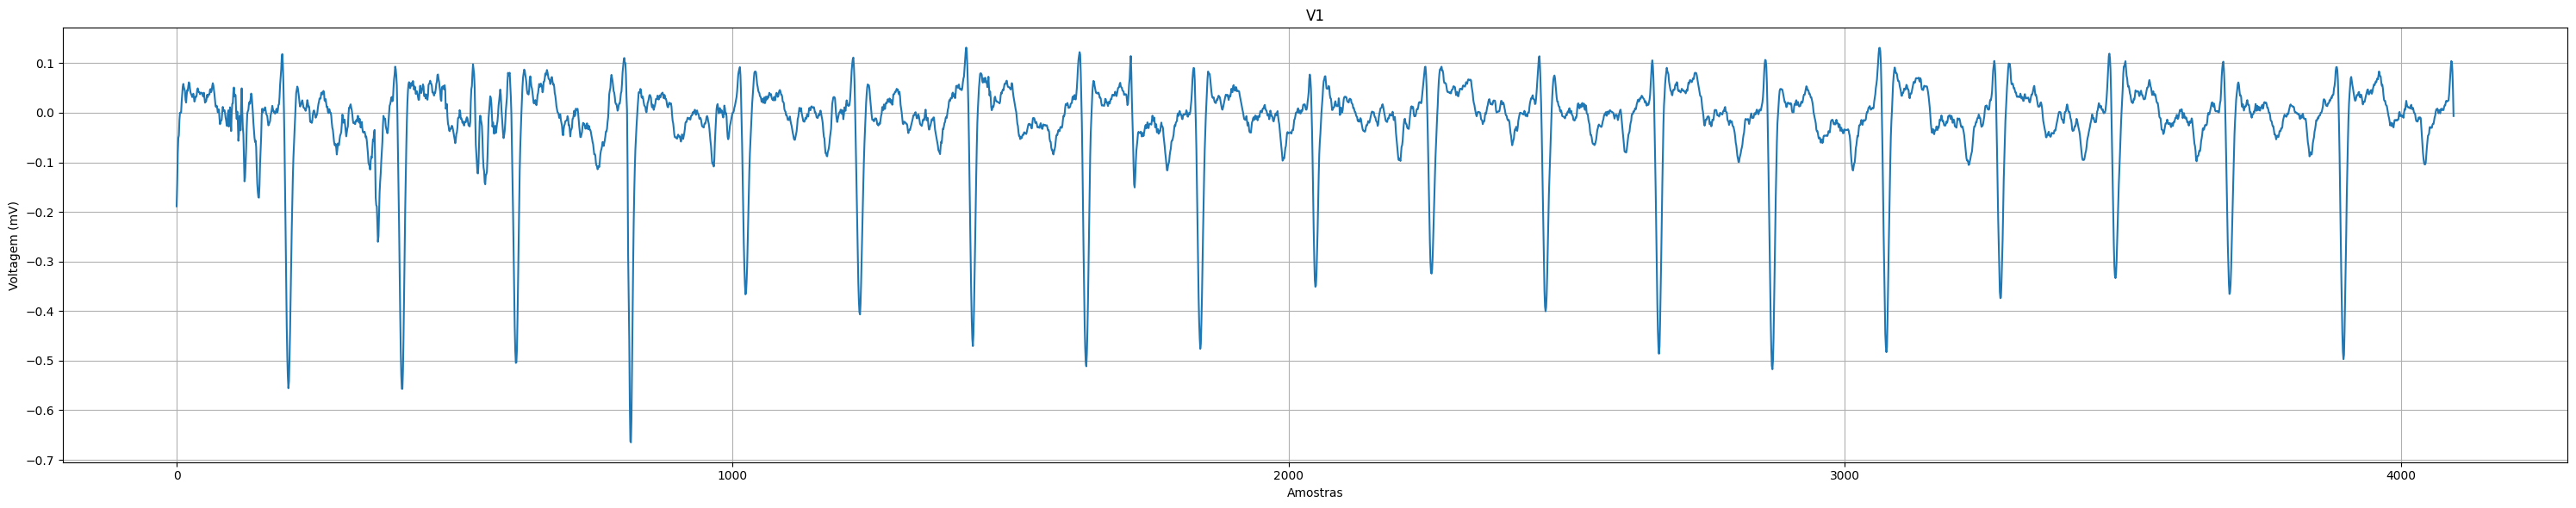

In [27]:
exam_id_to_plot = 1943318  # Substitua pelo exam_id que você deseja plotar
path_to_file = "exams_part17.hdf5"
with h5py.File(path_to_file, 'r') as f:
    # Obter os IDs dos exames
    exam_ids = np.array(f['exam_id'])

    # Encontrar o índice correspondente ao exam_id de interesse
    exam_index = np.where(exam_ids == exam_id_to_plot)[0]

    if len(exam_index) == 0:
        print("Exam ID não encontrado.")
    else:
        exam_index = exam_index[0]

        # Acessar os tracings de ECG correspondentes ao exam_index
        exam_tracings = f['tracings'][exam_index]

        # Plotar os tracings de ECG para cada lead
        leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        plt.figure(figsize=(30, 6))
        # Iterar sobre os leads
        plt.plot(exam_tracings[:, 6])
        plt.title(leads[6])
        plt.xlabel('Amostras')
        plt.ylabel('Voltagem (mV)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()
        
        
        
exam_id_to_plot = 1943318  # Substitua pelo exam_id que você deseja plotar
path_to_file = "filtered_exams.hdf5"
with h5py.File(path_to_file, 'r') as f:
    # Obter os IDs dos exames
    exam_ids = np.array(f['exam_id'])

    # Encontrar o índice correspondente ao exam_id de interesse
    exam_index = np.where(exam_ids == exam_id_to_plot)[0]

    if len(exam_index) == 0:
        print("Exam ID não encontrado.")
    else:
        exam_index = exam_index[0]

        # Acessar os tracings de ECG correspondentes ao exam_index
        exam_tracings = f['tracings'][exam_index]

        # Plotar os tracings de ECG para cada lead
        leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        plt.figure(figsize=(30, 6))
        # Iterar sobre os leads
        plt.plot(exam_tracings[:, 6])
        plt.title(leads[6])
        plt.xlabel('Amostras')
        plt.ylabel('Voltagem (mV)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()